# Importando las bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

**Gráfico sem valores nulos**

In [ ]:
np.random.seed(6)
datos = pd.date_range('1/1/2020', periods=24, freq='M')
ventas = np.random.randint(low=20,high=25,size=24)
df0 = pd.DataFrame({'mes':datos, 'ventas':ventas})

In [ ]:
df0.head(10)

,mes,ventas
0,2020-01-31,22
1,2020-02-29,21
2,2020-03-31,23
3,2020-04-30,24
4,2020-05-31,22
5,2020-06-30,22
6,2020-07-31,20
7,2020-08-31,21
8,2020-09-30,21
9,2020-10-31,23


## Fórmula para hacer los gráficos

In [ ]:
def grafico(variable_x, variable_y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=variable_x, y=variable_y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title('Ventas por mês de 2020 a 2021', loc='left', fontsize=18)
    ax.set_xlabel('Tiempo', fontsize=14)
    ax.set_ylabel('Ventas ($)', fontsize=14)
    ax = ax

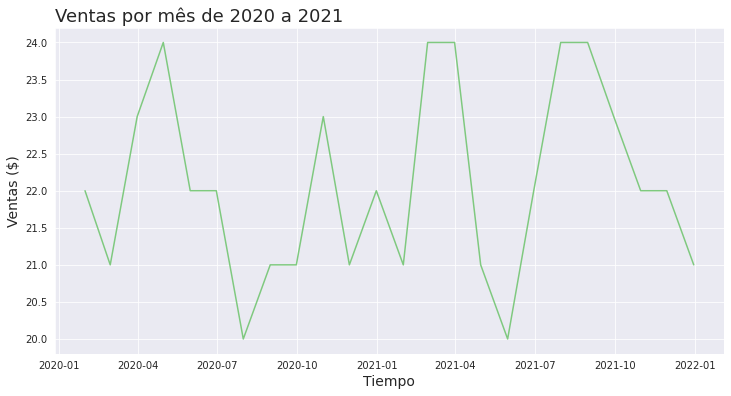

In [ ]:
grafico('mes', 'ventas', df0)

# Excluyendo el valor de ventas para dos valores específicos

In [ ]:
df0.loc[df0.ventas == 21,['ventas']] = np.nan
df0.loc[df0.ventas == 23,['ventas']] = np.nan

In [ ]:
df0.head()

,mes,ventas
0,2020-01-31,22.0
1,2020-02-29,NaN
2,2020-03-31,NaN
3,2020-04-30,24.0
4,2020-05-31,22.0


In [ ]:
df0['ventas'].isna().sum().sum()

10

# Solución 1 - Llenar los datos nulos con el valor médio de ventas

In [ ]:
df0.fillna(df0['ventas'].mean(),inplace=True)
df0['ventas'] = df0['ventas'].round()
df0.head(10)

,mes,ventas
0,2020-01-31,22.0
1,2020-02-29,22.0
2,2020-03-31,22.0
3,2020-04-30,24.0
4,2020-05-31,22.0
5,2020-06-30,22.0
6,2020-07-31,20.0
7,2020-08-31,22.0
8,2020-09-30,22.0
9,2020-10-31,22.0


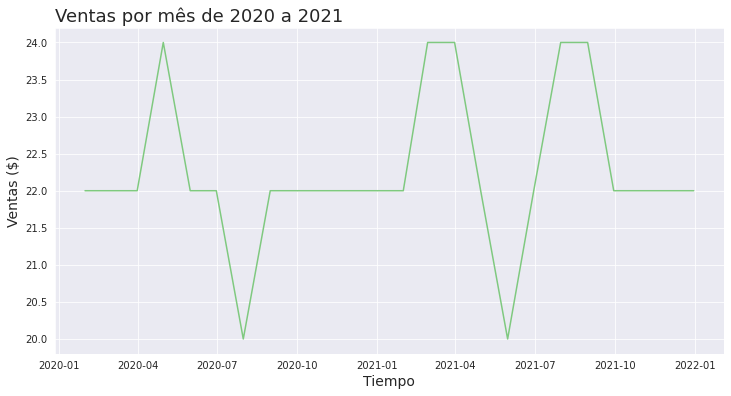

In [ ]:
grafico('mes', 'ventas', df0)

# Solución 2 - Transformar los valores nulos en un valor específico

In [ ]:
np.random.seed(6)
datos = pd.date_range('1/1/2020', periods=24, freq='M')
ventas = np.random.randint(low=20,high=25,size=24)
df2 = pd.DataFrame({'mes':datos, 'ventas':ventas})
df2.loc[df2.ventas == 21,['ventas']] = np.nan
df2.loc[df2.ventas == 23,['ventas']] = np.nan

In [ ]:
df2.isna().sum().sum()

10

**Valor de 20**

In [ ]:
df2.fillna(20,inplace=True)

In [ ]:
df2.isna().sum().sum()

0

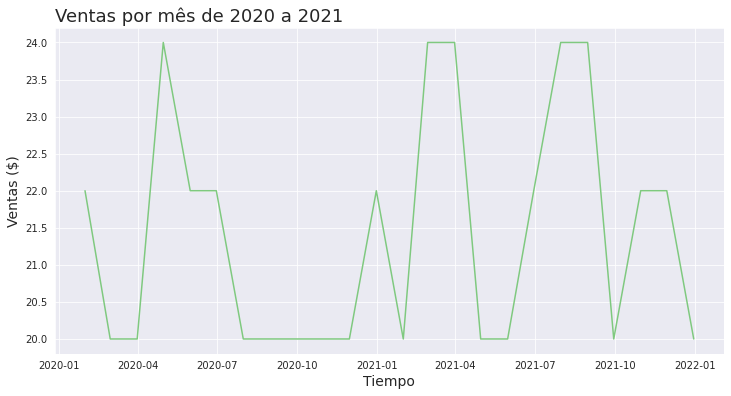

In [ ]:
grafico('mes', 'ventas', df2)

# Solución 3 - Remover datos nulos de la base o DataFrame

In [ ]:
np.random.seed(6)
datos = pd.date_range('1/1/2020', periods=24, freq='M')
ventas = np.random.randint(low=20,high=25,size=24)
df3 = pd.DataFrame({'mes':datos, 'ventas':ventas})
df3.loc[df3.ventas == 21,['ventas']] = np.nan
df3.loc[df3.ventas == 23,['ventas']] = np.nan

In [ ]:
df3.isna().sum().sum()

10

In [ ]:
df3.dropna(inplace=True)

In [ ]:
df3.isna().sum().sum()

0

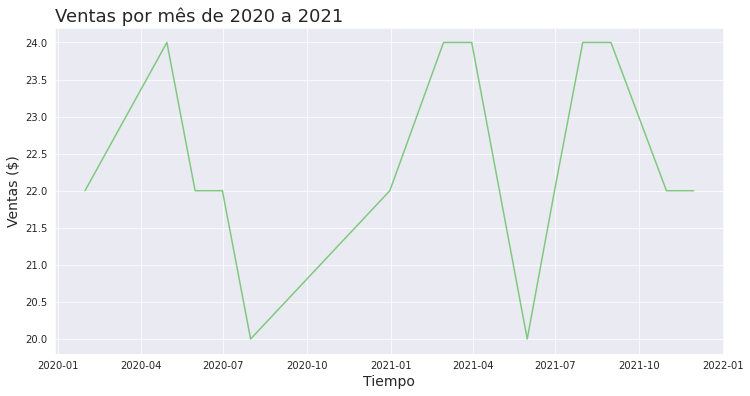

In [ ]:
grafico('mes', 'ventas', df3)

# Solución 4 - Llenar con el valor inmediatamente anterior o inmediatamente posterior

In [ ]:
np.random.seed(6)
datos = pd.date_range('1/1/2020', periods=24, freq='M')
ventas = np.random.randint(low=20,high=25,size=24)
df41 = pd.DataFrame({'mes':datos, 'ventas':ventas})
df41.loc[df41.ventas == 21,['ventas']] = np.nan
df41.loc[df41.ventas == 23,['ventas']] = np.nan

**ffill() - Anterior**

In [ ]:
df41.head()

,mes,ventas
0,2020-01-31,22.0
1,2020-02-29,NaN
2,2020-03-31,NaN
3,2020-04-30,24.0
4,2020-05-31,22.0


In [ ]:
df41.ffill(inplace=True)

In [ ]:
df41.head()

,mes,ventas
0,2020-01-31,22.0
1,2020-02-29,22.0
2,2020-03-31,22.0
3,2020-04-30,24.0
4,2020-05-31,22.0


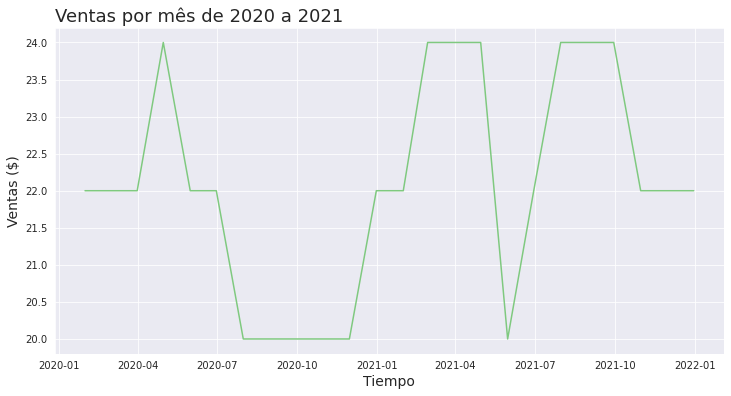

In [ ]:
grafico('mes', 'ventas', df41)

**bfill - posterior**

In [ ]:
np.random.seed(6)
datos = pd.date_range('1/1/2020', periods=24, freq='M')
ventas = np.random.randint(low=20,high=25,size=24)
df42 = pd.DataFrame({'mes':datos, 'ventas':ventas})
df42.loc[df42.ventas == 21,['ventas']] = np.nan
df42.loc[df42.ventas == 23,['ventas']] = np.nan

In [ ]:
df42.head()

,mes,ventas
0,2020-01-31,22.0
1,2020-02-29,NaN
2,2020-03-31,NaN
3,2020-04-30,24.0
4,2020-05-31,22.0


In [ ]:
df42.bfill(inplace=True)

In [ ]:
df42.head()

,mes,ventas
0,2020-01-31,22.0
1,2020-02-29,24.0
2,2020-03-31,24.0
3,2020-04-30,24.0
4,2020-05-31,22.0


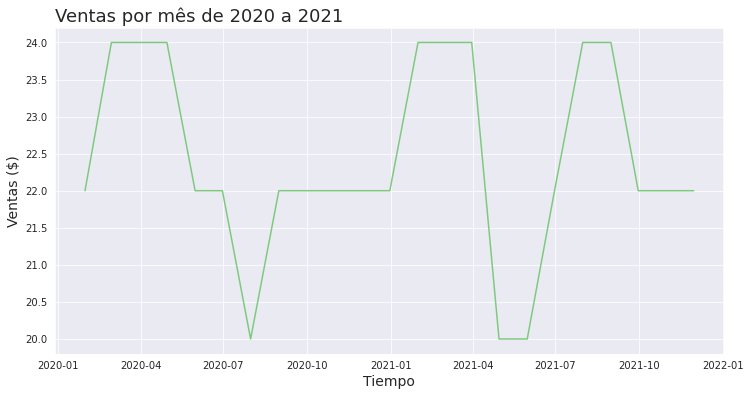

In [ ]:
grafico('mes', 'ventas', df42)

# Solución 5 - Interpolando datos nulos con un valor médio


In [ ]:
np.random.seed(6)
datos = pd.date_range('1/1/2020', periods=24, freq='M')
ventas = np.random.randint(low=20,high=25,size=24)
df5 = pd.DataFrame({'mes':datos, 'ventas':ventas})
df5.loc[df5.ventas == 21,['ventas']] = np.nan
df5.loc[df5.ventas == 23,['ventas']] = np.nan

In [ ]:
df5.head()

,mes,ventas
0,2020-01-31,22.0
1,2020-02-29,NaN
2,2020-03-31,NaN
3,2020-04-30,24.0
4,2020-05-31,22.0


In [ ]:
df5.interpolate(inplace=True)

In [ ]:
df5.head()

,mes,ventas
0,2020-01-31,22.000000
1,2020-02-29,22.666667
2,2020-03-31,23.333333
3,2020-04-30,24.000000
4,2020-05-31,22.000000


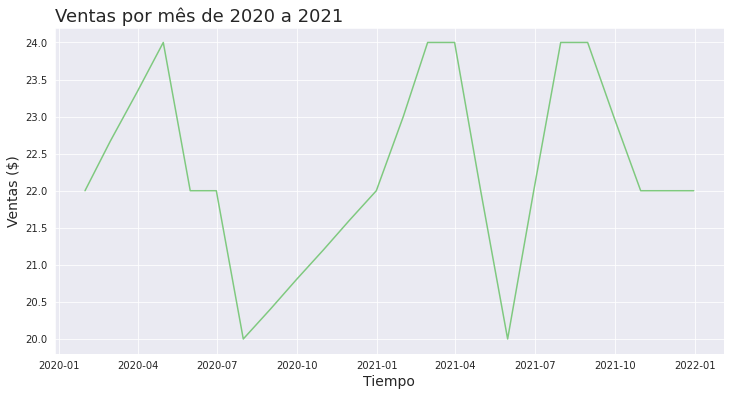

In [ ]:
grafico('mes', 'ventas', df5)